In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

# 지도 시각화
import folium
import json

In [256]:
# 데이터 불러오기

corona_seoul = pd.read_csv("서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding="euc-kr", thousands=",")
corona_seoul.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.03.30.00,37261,1045,33753,919,55376,1504,81018,1990,96008,...,104368,3839,136200,3872,176765,4479,121926,3084,164008,4988
1,2022.03.29.00,36216,940,32835,957,53872,1481,79030,2233,93474,...,100529,1660,132333,3524,172292,4913,118842,2996,159020,3230
2,2022.03.28.00,35276,397,31878,301,52391,739,76802,694,91030,...,98869,1996,128813,2517,167386,2013,115846,2297,155792,1630
3,2022.03.27.00,34879,818,31577,674,51652,932,76108,1930,89876,...,96873,1749,126296,2304,165373,3723,113549,2900,154162,3116
4,2022.03.26.00,34061,854,30903,793,50720,1234,74178,1685,87770,...,95124,2467,123992,3862,161650,4013,110649,3133,151046,4050


In [257]:
corona_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구 기준일  786 non-null    object
 1   종로구 전체   786 non-null    int64 
 2   종로구 추가   786 non-null    int64 
 3   중구 전체    786 non-null    int64 
 4   중구 추가    786 non-null    int64 
 5   용산구 전체   786 non-null    int64 
 6   용산구 추가   786 non-null    int64 
 7   성동구 전체   786 non-null    int64 
 8   성동구 추가   786 non-null    int64 
 9   광진구 전체   786 non-null    int64 
 10  광진구 추가   786 non-null    int64 
 11  동대문구 전체  786 non-null    int64 
 12  동대문구 추가  786 non-null    int64 
 13  중랑구 전체   786 non-null    int64 
 14  중랑구 추가   786 non-null    int64 
 15  성북구 전체   786 non-null    int64 
 16  성북구 추가   786 non-null    int64 
 17  강북구 전체   786 non-null    int64 
 18  강북구 추가   786 non-null    int64 
 19  도봉구 전체   786 non-null    int64 
 20  도봉구 추가   786 non-null    int64 
 21  노원구 전체   786 non-null    int64 
 22  노원

In [258]:
# 일별 확진자 수만 불러오기

corona_gu = corona_seoul[['자치구 기준일','종로구 추가', '중구 추가', '용산구 추가', '성동구 추가', '광진구 추가',
             '동대문구 추가', '중랑구 추가', '성북구 추가', '강북구 추가', '도봉구 추가', '노원구 추가',
             '은평구 추가', '서대문구 추가', '마포구 추가', '양천구 추가', '강서구 추가', '구로구 추가', 
             '금천구 추가', '영등포구 추가', '동작구 추가', '관악구 추가', '서추구 추가', '강남구 추가',
             '송파구 추가', '강동구 추가', '기타 추가']]
corona_gu.head()

,자치구 기준일,종로구 추가,중구 추가,용산구 추가,성동구 추가,광진구 추가,동대문구 추가,중랑구 추가,성북구 추가,강북구 추가,...,구로구 추가,금천구 추가,영등포구 추가,동작구 추가,관악구 추가,서추구 추가,강남구 추가,송파구 추가,강동구 추가,기타 추가
0,2022.03.30.00,1045,919,1504,1990,2534,2442,3033,3253,2184,...,3812,1847,4122,3283,4679,3839,3872,4479,3084,4988
1,2022.03.29.00,940,957,1481,2233,2444,2718,2837,3028,2180,...,2595,1894,2072,2290,2821,1660,3524,4913,2996,3230
2,2022.03.28.00,397,301,739,694,1154,975,1060,1083,751,...,963,553,1193,1239,1431,1996,2517,2013,2297,1630
3,2022.03.27.00,818,674,932,1930,2106,1957,2669,3063,1674,...,2672,1468,2567,2437,2961,1749,2304,3723,2900,3116
4,2022.03.26.00,854,793,1234,1685,2210,2039,2447,2516,1724,...,2642,1554,2693,2398,3222,2467,3862,4013,3133,4050


In [259]:
# 칼럼명 수정

corona_gu.rename(columns={#'자치구 기준일' : '확진일',
                            '종로구 추가':'종로구',
                            '중구 추가':'중구',
                            '용산구 추가':'용산구',
                            '성동구 추가':'성동구',
                            '광진구 추가':'광진구',
                            '동대문구 추가':'동대문구',
                            '중랑구 추가':'중랑구',
                            '성북구 추가':'성북구',
                            '강북구 추가':'강북구',
                            '도봉구 추가':'도봉구',
                            '노원구 추가':'노원구',
                            '은평구 추가':'은평구',
                            '서대문구 추가':'서대문구',
                            '마포구 추가':'마포구',
                            '양천구 추가':'양천구',
                            '강서구 추가':'강서구',
                            '구로구 추가':'구로구',
                            '금천구 추가':'금천구',
                            '영등포구 추가':'영등포구',
                            '동작구 추가':'동작구',
                            '관악구 추가':'관악구',
                            '서추구 추가':'서초구',
                            '강남구 추가':'강남구',
                            '송파구 추가':'송파구',
                            '강동구 추가':'강동구',
                            '기타 추가':'기타'}, inplace=True)
corona_gu.head()

C:\Users\ch002\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2022.03.30.00,1045,919,1504,1990,2534,2442,3033,3253,2184,...,3812,1847,4122,3283,4679,3839,3872,4479,3084,4988
1,2022.03.29.00,940,957,1481,2233,2444,2718,2837,3028,2180,...,2595,1894,2072,2290,2821,1660,3524,4913,2996,3230
2,2022.03.28.00,397,301,739,694,1154,975,1060,1083,751,...,963,553,1193,1239,1431,1996,2517,2013,2297,1630
3,2022.03.27.00,818,674,932,1930,2106,1957,2669,3063,1674,...,2672,1468,2567,2437,2961,1749,2304,3723,2900,3116
4,2022.03.26.00,854,793,1234,1685,2210,2039,2447,2516,1724,...,2642,1554,2693,2398,3222,2467,3862,4013,3133,4050


In [260]:
# 2021년 데이터만 가져오기
corona_2021 = corona_gu[89:455]
corona_2021

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
89,2021.12.31.00,24,22,38,43,61,72,68,71,58,...,62,40,78,52,70,52,86,109,106,100
90,2021.12.30.00,28,23,33,53,62,63,64,86,77,...,83,40,76,64,77,69,84,120,92,113
91,2021.12.29.00,43,33,36,42,49,98,69,82,66,...,86,54,87,73,77,71,67,86,91,180
92,2021.12.28.00,40,23,29,39,51,61,39,107,44,...,45,25,42,41,51,33,67,82,57,77
93,2021.12.27.00,30,29,31,26,43,61,71,111,59,...,30,37,42,50,77,56,69,116,57,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12
451,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
452,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
453,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24


In [261]:
# 데이터 역순으로
corona_2021=corona_2021[::-1]
corona_2021.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
454,2021.01.01.00,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
453,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
452,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
451,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
450,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12


In [262]:
#인덱스 다시 설정
corona_2021=corona_2021.reset_index(drop=True)
corona_2021

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021.01.01.00,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
1,2021.01.02.00,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
2,2021.01.03.00,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
3,2021.01.04.00,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
4,2021.01.05.00,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021.12.27.00,30,29,31,26,43,61,71,111,59,...,30,37,42,50,77,56,69,116,57,78
362,2021.12.28.00,40,23,29,39,51,61,39,107,44,...,45,25,42,41,51,33,67,82,57,77
363,2021.12.29.00,43,33,36,42,49,98,69,82,66,...,86,54,87,73,77,71,67,86,91,180
364,2021.12.30.00,28,23,33,53,62,63,64,86,77,...,83,40,76,64,77,69,84,120,92,113


In [263]:
# 날짜 수정(뒤에 쓸모없는 00 빼기)

day = []

for data in corona_2021['자치구 기준일']:
    day.append(data[0:10])
    
day
corona_2021['자치구 기준일']=day
corona_2021.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,2021.01.01,11,1,2,7,7,8,20,8,13,...,7,6,15,17,12,5,6,14,5,133
1,2021.01.02,10,1,7,10,2,6,8,10,14,...,3,1,15,36,6,8,3,8,10,24
2,2021.01.03,4,0,3,0,5,5,3,8,19,...,8,4,8,6,4,9,3,12,12,16
3,2021.01.04,4,2,1,9,9,6,14,8,14,...,9,5,14,10,6,4,11,8,8,130
4,2021.01.05,4,1,4,4,6,13,11,7,16,...,9,7,11,8,6,2,10,11,11,12


In [264]:
# 확진일 데이터타입 변경

corona_2021['자치구 기준일'] = pd.to_datetime(corona_2021['자치구 기준일'], format="%Y.%m.%d")
corona_2021.rename(columns={'자치구 기준일':'확진일'}, inplace=True)
corona_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     366 non-null    datetime64[ns]
 1   종로구     366 non-null    int64         
 2   중구      366 non-null    int64         
 3   용산구     366 non-null    int64         
 4   성동구     366 non-null    int64         
 5   광진구     366 non-null    int64         
 6   동대문구    366 non-null    int64         
 7   중랑구     366 non-null    int64         
 8   성북구     366 non-null    int64         
 9   강북구     366 non-null    int64         
 10  도봉구     366 non-null    int64         
 11  노원구     366 non-null    int64         
 12  은평구     366 non-null    int64         
 13  서대문구    366 non-null    int64         
 14  마포구     366 non-null    int64         
 15  양천구     366 non-null    int64         
 16  강서구     366 non-null    int64         
 17  구로구     366 non-null    int64         
 18  금천구     36

### 월 별 확진자

In [265]:
# 월별로 묶기

month_2021 = corona_2021
month_2021['월'] = pd.DatetimeIndex(month_2021['확진일']).month #확진일에서 월 뽑아오기

month_2021 = month_2021.groupby("월").sum() #월별로 묶어서 합 구하기
month_2021


,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
월,,,,,,,,,,,,,,,,,,,,,
1,122,74,106,141,125,222,219,211,186,182,...,184,74,194,215,171,142,225,252,183,727
2,42,88,235,119,153,178,167,208,123,140,...,237,71,172,150,186,111,124,210,158,421
3,63,79,131,139,253,114,188,137,122,113,...,123,25,127,172,123,158,222,191,249,233
4,62,72,106,190,247,256,340,206,133,179,...,143,87,203,273,310,356,438,390,250,302
5,80,93,173,172,219,253,285,272,260,230,...,194,153,263,226,252,282,540,448,324,250
6,64,93,242,225,232,194,178,235,164,107,...,163,105,273,218,258,337,749,425,266,319
7,201,213,480,487,466,383,417,486,354,372,...,559,316,650,725,1104,769,1275,832,518,637
8,222,280,448,363,528,432,524,529,337,241,...,619,374,838,674,1012,666,1242,900,447,747
9,396,562,414,591,879,925,664,747,553,520,...,1418,585,1121,700,1062,659,1242,1671,863,1125


## 1. 서울 월별 확진자 총합

In [266]:
# 서울 2021년 월별 확진자 수 구하기

# 월별 총 합
month_2021['합']=month_2021.sum(axis=1)
month_2021

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합
월,,,,,,,,,,,,,,,,,,,,,
1,122,74,106,141,125,222,219,211,186,182,...,74,194,215,171,142,225,252,183,727,5133
2,42,88,235,119,153,178,167,208,123,140,...,71,172,150,186,111,124,210,158,421,4068
3,63,79,131,139,253,114,188,137,122,113,...,25,127,172,123,158,222,191,249,233,3801
4,62,72,106,190,247,256,340,206,133,179,...,87,203,273,310,356,438,390,250,302,5810
5,80,93,173,172,219,253,285,272,260,230,...,153,263,226,252,282,540,448,324,250,6303
6,64,93,242,225,232,194,178,235,164,107,...,105,273,218,258,337,749,425,266,319,6107
7,201,213,480,487,466,383,417,486,354,372,...,316,650,725,1104,769,1275,832,518,637,14377
8,222,280,448,363,528,432,524,529,337,241,...,374,838,674,1012,666,1242,900,447,747,15019
9,396,562,414,591,879,925,664,747,553,520,...,585,1121,700,1062,659,1242,1671,863,1125,21148


<AxesSubplot:xlabel='월'>

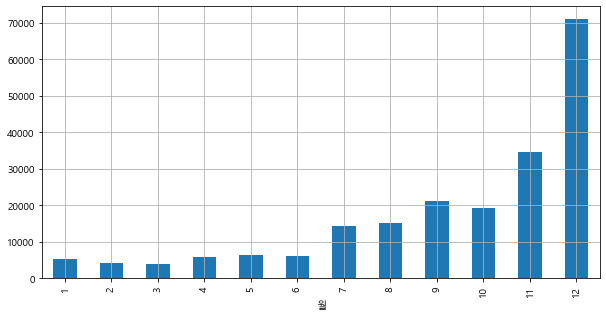

In [267]:
# 서울 전체 월 별 확진자 수 그래프

month_2021['합'].plot(kind="bar", figsize=(10,5), grid=True)

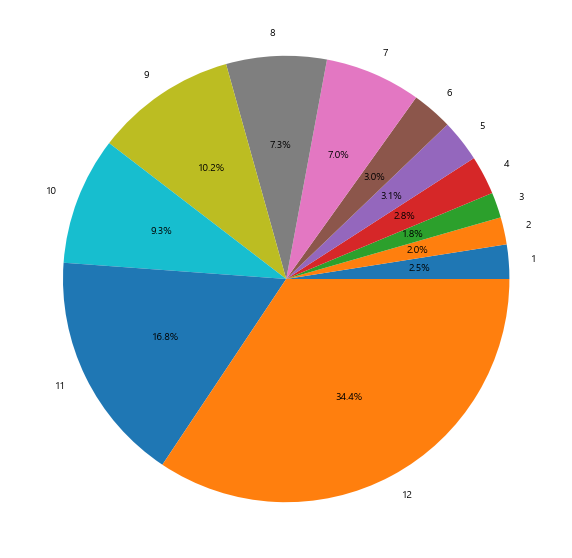

In [268]:
# 원 그래프

plt.figure(figsize=(10,10))
plt.axis('equal')
plt.pie(month_2021['합'], labels=month_2021.index, autopct="%1.1f%%")
plt.show()

In [269]:
# 위 두 그래프에서 볼 수 있듯이 7월부터 확진자가 증가하여 12월에 그 전달인 11월의 확진자보다 2배이상 증가한 모습을 볼 수 있다.

## 2. 요일별 코로나 확진자

In [270]:
# 2021년 1월 1일은 금요일

day_2021 = corona_2021
day_2021.drop(['월'], axis=1, inplace=True)
day_2021['합']=day_2021.sum(axis=1)
day_2021.head() #데이터 준비

C:\Users\ch002\AppData\Local\Temp/ipykernel_5700/3515983049.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_2021['합']=day_2021.sum(axis=1)


,확진일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합
0,2021-01-01,11,1,2,7,7,8,20,8,13,...,6,15,17,12,5,6,14,5,133,363
1,2021-01-02,10,1,7,10,2,6,8,10,14,...,1,15,36,6,8,3,8,10,24,248
2,2021-01-03,4,0,3,0,5,5,3,8,19,...,4,8,6,4,9,3,12,12,16,191
3,2021-01-04,4,2,1,9,9,6,14,8,14,...,5,14,10,6,4,11,8,8,130,331
4,2021-01-05,4,1,4,4,6,13,11,7,16,...,7,11,8,6,2,10,11,11,12,194


In [271]:
diff = day_2021['확진일'] - pd.to_datetime("2021-01-01")
diff = diff.astype(str)

diff_num = diff.str.split(" ", expand=True)[0].astype(int)
diff_num

def weekdays(x):
    if x % 7 == 0:
        return "금요일"
    elif x % 7 == 1 :
        return "토요일"
    elif x % 7 == 2 :
        return "일요일"
    elif x % 7 == 3 :
        return "월요일"
    elif x % 7 == 4 :
        return "화요일"
    elif x % 7 == 5 :
        return "수요일"
    elif x % 7 == 6 :
        return "목요일"

day_2021['weekdays'] = diff_num.apply(weekdays)
day_2021.head(10)

,확진일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합,weekdays
0,2021-01-01,11,1,2,7,7,8,20,8,13,...,15,17,12,5,6,14,5,133,363,금요일
1,2021-01-02,10,1,7,10,2,6,8,10,14,...,15,36,6,8,3,8,10,24,248,토요일
2,2021-01-03,4,0,3,0,5,5,3,8,19,...,8,6,4,9,3,12,12,16,191,일요일
3,2021-01-04,4,2,1,9,9,6,14,8,14,...,14,10,6,4,11,8,8,130,331,월요일
4,2021-01-05,4,1,4,4,6,13,11,7,16,...,11,8,6,2,10,11,11,12,194,화요일
5,2021-01-06,12,1,5,5,5,10,7,14,8,...,8,9,7,12,7,21,1,18,260,수요일
6,2021-01-07,5,3,2,4,16,5,10,17,15,...,8,4,5,7,13,7,10,77,298,목요일
7,2021-01-08,2,3,8,4,2,4,9,16,3,...,10,4,5,4,8,16,9,15,191,금요일
8,2021-01-09,4,0,2,1,6,7,4,6,8,...,15,9,9,7,10,15,4,20,187,토요일
9,2021-01-10,9,0,1,3,7,5,7,7,6,...,9,7,8,4,9,10,10,26,186,일요일


In [272]:
# 요일별 총 합 확진자 수 구하기

day_2021.groupby(['weekdays'])[["합"]].mean()

,합
weekdays,
금요일,615.584906
목요일,642.153846
수요일,655.283019
월요일,453.923077
일요일,539.653846
토요일,595.538462
화요일,446.057692


<AxesSubplot:xlabel='weekdays', ylabel='합'>

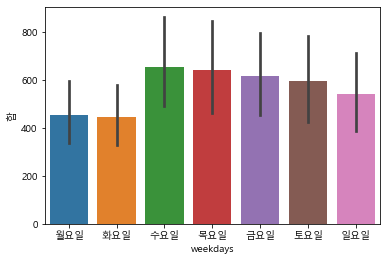

In [274]:
# 그래프 그리기
sns.barplot(x="weekdays", y="합", data=day_2021,
           order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])

In [275]:
day_2021 = day_2021.groupby('weekdays').sum()
day_2021

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,합
weekdays,,,,,,,,,,,,,,,,,,,,,
금요일,538,515,746,806,1052,1457,1242,1356,1036,989,...,924,1620,1283,1554,1100,1764,2041,1417,2228,32626
목요일,544,626,763,823,1036,1391,1203,1324,973,978,...,867,1615,1182,1656,1220,1893,1932,1407,2988,33392
수요일,567,601,882,856,1079,1468,1285,1308,970,1078,...,918,1686,1340,1862,1289,1909,2136,1511,2133,34730
월요일,439,387,524,592,784,947,950,1188,706,669,...,625,1128,945,1222,889,1310,1529,961,1442,23604
일요일,492,477,670,721,870,1224,1046,1169,797,788,...,762,1340,1134,1446,1025,1483,1666,1205,2128,28062
토요일,541,549,734,800,986,1315,1104,1196,885,966,...,849,1499,1215,1544,1142,1746,1856,1248,2276,30968
화요일,470,397,559,663,808,977,859,1110,887,743,...,535,962,879,984,828,1429,1294,879,1444,23195


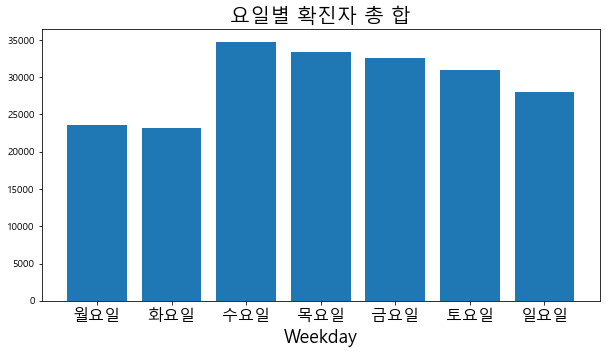

In [276]:
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'] 
day_2021 = day_2021.loc[weekday_order]

plt.figure(figsize=(10, 5)) 
plt.bar(day_2021.index, day_2021['합']) 
plt.title("요일별 확진자 총 합", fontsize=20) 
plt.xlabel("Weekday", fontsize=18) 
plt.xticks(fontsize=16) 
plt.show()

## 3. 1년간 각 구별 총 확진자

In [277]:
# 1년간 구별 총 합 구하기

year_2021 = month_2021
del year_2021['합']
year_2021
year_2021.loc['총합'] =  month_2021.sum()
year_2021

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
월,,,,,,,,,,,,,,,,,,,,,
1,122,74,106,141,125,222,219,211,186,182,...,184,74,194,215,171,142,225,252,183,727
2,42,88,235,119,153,178,167,208,123,140,...,237,71,172,150,186,111,124,210,158,421
3,63,79,131,139,253,114,188,137,122,113,...,123,25,127,172,123,158,222,191,249,233
4,62,72,106,190,247,256,340,206,133,179,...,143,87,203,273,310,356,438,390,250,302
5,80,93,173,172,219,253,285,272,260,230,...,194,153,263,226,252,282,540,448,324,250
6,64,93,242,225,232,194,178,235,164,107,...,163,105,273,218,258,337,749,425,266,319
7,201,213,480,487,466,383,417,486,354,372,...,559,316,650,725,1104,769,1275,832,518,637
8,222,280,448,363,528,432,524,529,337,241,...,619,374,838,674,1012,666,1242,900,447,747
9,396,562,414,591,879,925,664,747,553,520,...,1418,585,1121,700,1062,659,1242,1671,863,1125


<AxesSubplot:>

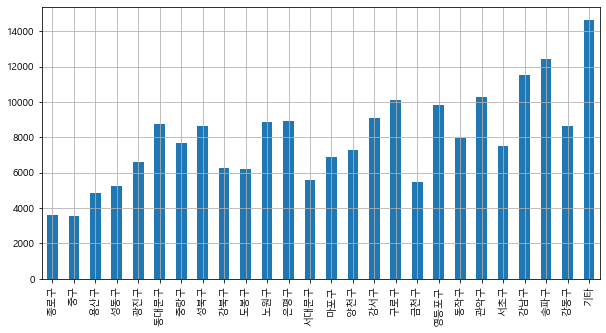

In [278]:
# 각 구별 1년간 총 합 그래프 그리기

year_2021.loc['총합'].plot(kind="bar", figsize=(10,5), grid=True)

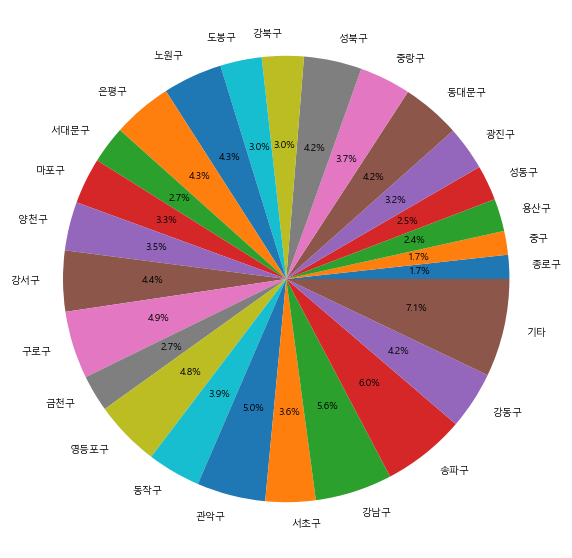

In [279]:
# 각 구별 1년간 총 합 그래프 그리기 - 원

plt.figure(figsize=(10,10))
plt.axis('equal')
plt.pie(year_2021.loc['총합'], labels=year_2021.columns, autopct="%1.1f%%")
plt.show()

In [280]:
# 기타(소재불분명)을 제외하고 송파구, 강남구, 관악구 순으로 확진자가 많고 
# 중구, 종로구, 용산구가 비교적 확진자 수가 적은것을 알 수 있다

In [281]:
# 지도 시각화 준비

m_year = year_2021.transpose()
m_year

월,1,2,3,4,5,6,7,8,9,10,11,12,총합
종로구,122,42,63,62,80,64,201,222,396,511,618,1210,3591
중구,74,88,79,72,93,93,213,280,562,368,596,1034,3552
용산구,106,235,131,106,173,242,480,448,414,435,629,1479,4878
성동구,141,119,139,190,172,225,487,363,591,454,800,1580,5261
광진구,125,153,253,247,219,232,466,528,879,515,928,2070,6615
동대문구,222,178,114,256,253,194,383,432,925,1002,1641,3179,8779
중랑구,219,167,188,340,285,178,417,524,664,637,1213,2857,7689
성북구,211,208,137,206,272,235,486,529,747,835,1698,3087,8651
강북구,186,123,122,133,260,164,354,337,553,663,1135,2224,6254
도봉구,182,140,113,179,230,107,372,241,520,546,1093,2488,6211


In [282]:
# 지도로 시각화

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"#구 이름이 한글로 되어있기 때문에 바로 못넘김
geo_str=json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)
map.choropleth(geo_data=geo_str, data=m_year['총합'], key_on='feature.id',
              columns=[m_year.index, m_year['총합']], fill_color="PuRd")
map

C:\Users\ch002\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<AxesSubplot:xlabel='월'>

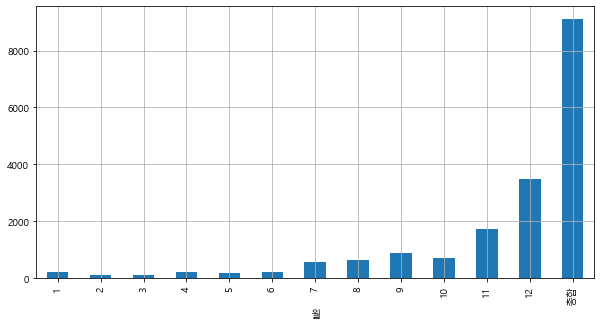

In [283]:
# 2021년 강서구 총 확진자

month_2021["강서구"].plot(kind="bar", figsize=(10,5), grid=True)

In [284]:
corona_seoul

gangseo = corona_seoul[['자치구 기준일', '강서구 전체', '강서구 추가']]
gangseo = gangseo[89:455]

day = []

for data in gangseo['자치구 기준일']:
    day.append(data[0:10])
    
day
gangseo['자치구 기준일']=day

gangseo['자치구 기준일'] = pd.to_datetime(gangseo['자치구 기준일'], format="%Y.%m.%d")

gangseo=gangseo[::-1]

gangseo=gangseo.reset_index(drop=True)

gangseo

,자치구 기준일,강서구 전체,강서구 추가
0,2021-01-01,1341,7
1,2021-01-02,1354,13
2,2021-01-03,1363,9
3,2021-01-04,1378,15
4,2021-01-05,1382,4
...,...,...,...
361,2021-12-27,10150,59
362,2021-12-28,10192,42
363,2021-12-29,10294,102
364,2021-12-30,10360,66


<AxesSubplot:xlabel='자치구 기준일'>

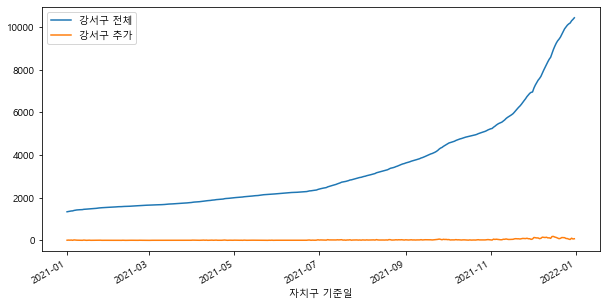

In [285]:
# 강서구 전체 확진자, 추가 확진자 그래프

gangseo = gangseo.set_index('자치구 기준일')
gangseo.plot(figsize=(10,5))

<AxesSubplot:title={'center':'확진수'}, xlabel='자치구 기준일'>

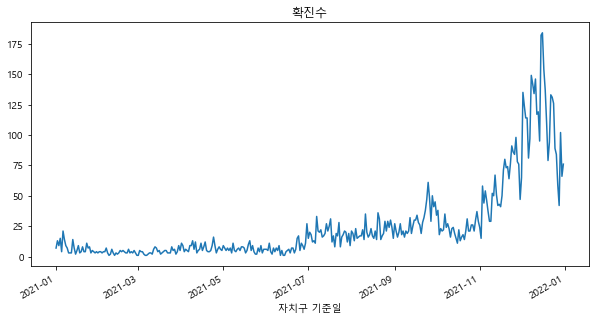

In [286]:
# 1년간 강서구 확진자 그래프
gangseo['강서구 추가'].plot(figsize=(10,5), title="확진수")

<AxesSubplot:title={'center':'강서구 누적확진수'}, xlabel='자치구 기준일'>

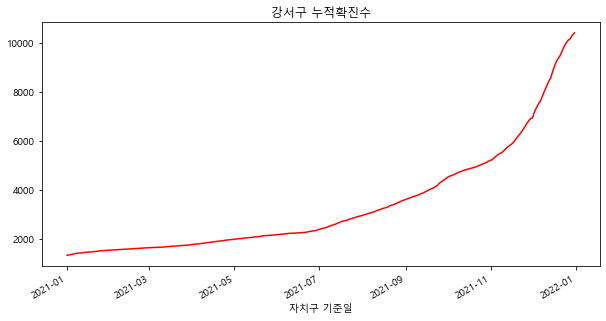

In [287]:
# 1년간 강서구 누적 확진자 그래프

gangseo['강서구 전체'].plot(figsize=(10,5), title="강서구 누적확진수", color="red")